# Comprensión de los indicadores socioeconómicos y demográficos de Argentina

##### Importamos librerias

In [77]:
from zipfile import ZipFile
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
zip_e = ZipFile('P_Data_Extract_From_World_Development_Indicators.zip')

In [79]:
df_data = pd.read_csv(zip_e.open('data.csv'))

In [80]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   16 non-null     object 
 1   Country Code   14 non-null     object 
 2   Series Name    14 non-null     object 
 3   Series Code    14 non-null     object 
 4   1999 [YR1999]  14 non-null     object 
 5   2000 [YR2000]  14 non-null     object 
 6   2001 [YR2001]  14 non-null     object 
 7   2002 [YR2002]  14 non-null     object 
 8   2003 [YR2003]  14 non-null     object 
 9   2004 [YR2004]  14 non-null     object 
 10  2005 [YR2005]  14 non-null     object 
 11  2006 [YR2006]  14 non-null     object 
 12  2007 [YR2007]  14 non-null     object 
 13  2008 [YR2008]  14 non-null     object 
 14  2009 [YR2009]  14 non-null     object 
 15  2010 [YR2010]  14 non-null     object 
 16  2011 [YR2011]  14 non-null     object 
 17  2012 [YR2012]  14 non-null     object 
 18  2013 [YR2013

In [81]:
df_data

,Country Name,Country Code,Series Name,Series Code,1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,283523000000,284203750000,268696750000,97724004251.8602,127586973492.177,164657930452.787,...,526319673731.638,594749285413.212,557532320662.955,6.436284e+11,5.248199e+11,4.477547e+11,3.857405e+11,4.865641e+11,6.327901e+11,646075277525.125
1,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-3.38545704063269,-0.78899893905691,-4.40883968258557,-10.8944848285903,8.83704079576924,9.02957330068152,...,-2.51261532081394,2.73115982828944,-2.08032784377811,2.818503e+00,-2.617396e+00,-2.000861e+00,-9.900485e+00,1.044181e+01,5.269880e+00,-1.61100162090189
2,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,7705.54288252851,7637.01489203628,7141.47507662826,2569.69963519124,3320.47775133903,4242.02099089422,...,12233.1444119186,13679.6264980954,12699.9623137756,1.453250e+04,1.175280e+04,9.955975e+03,8.535599e+03,1.073802e+04,1.393568e+04,14187.4827252965
3,Argentina,ARG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,11463.853308121,11499.9828002698,11117.754923304,9953.46492878861,10933.3925490662,12117.6797424618,...,19487.4181748868,19899.1499275245,20105.761359796,2.338507e+04,2.441039e+04,2.351683e+04,2.239335e+04,2.630027e+04,2.959769e+04,30082.3045247323
4,Argentina,ARG,"Population, total",SP.POP.TOTL,36794682,37213984,37624825,38029349,38424282,38815916,...,43024071,43477012,43900313,4.428889e+07,4.465488e+07,4.497346e+07,4.519196e+07,4.531228e+07,4.540790e+07,45538401
5,Argentina,ARG,Population growth (annual %),SP.POP.GROW,1.15304317167294,1.13312807570195,1.09794672757946,1.06941318335345,1.0331399769648,1.01407652046238,...,1.0317435786984,1.04725888735726,0.968911125580978,8.812496e-01,8.229695e-01,7.109009e-01,4.846656e-01,2.658794e-01,2.108087e-01,0.286976121920089
6,Argentina,ARG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,88.952,89.142,89.329,89.51,89.686,89.86,...,91.377,91.503,91.627,9.174900e+01,9.187000e+01,9.199100e+01,9.211100e+01,9.222900e+01,9.234700e+01,92.463
7,Argentina,ARG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,61.2236911618814,60.8399424011737,60.442088771688,60.0100181534326,59.5157720560259,58.9908808603745,...,56.0256427923844,56.0522891497333,56.0461721346243,5.597280e+01,5.585293e+01,5.559318e+01,5.502080e+01,5.421952e+01,5.333855e+01,52.4243366823125
8,Argentina,ARG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,30.3,2.570000e+01,3.200000e+01,3.550000e+01,4.200000e+01,3.730000e+01,3.920000e+01,..
9,Argentina,ARG,Gini index,SI.POV.GINI,49.8,51,53.3,53.8,51,48.5,...,41.8,..,42.3,4.140000e+01,4.170000e+01,4.330000e+01,4.270000e+01,4.240000e+01,4.070000e+01,..


In [82]:
df_data.shape

(19, 29)

### Quitando datos duplicados, nulos e irrelevantes.

In [83]:
df_data.isna().sum()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
1999 [YR1999]    5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
dtype: int64

In [84]:
df_data.dropna(inplace=True)

In [85]:
df_data.duplicated().sum()

np.int64(0)

In [86]:
df_data = df_data.replace('..', np.nan)
df_copy = df_data.copy()

### Arreglar errores estructurales

Quitamos las columnas innecesarias

In [87]:
df_data.drop(['Country Code','Country Name','Series Code',], axis=1, inplace=True)


Convertimos todas las columnas de los años a un formato que podamos manejar

In [88]:
years = range(1999, 2024)
columns = [f"{year} [YR{year}]" for year in years]

df_data[columns] = df_data[columns].astype(float)


In [89]:
def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

### Identificando outliers

In [90]:
for i,column in enumerate(columns):
    outliers_i = identify_outliers(df_data[columns[i]])
    print(f"Outliers in {column}: {outliers_i}\n")

Outliers in 1999 [YR1999]: 0    2.835230e+11
4    3.679468e+07
Name: 1999 [YR1999], dtype: float64

Outliers in 2000 [YR2000]: 0    2.842038e+11
4    3.721398e+07
Name: 2000 [YR2000], dtype: float64

Outliers in 2001 [YR2001]: 0    2.686968e+11
4    3.762482e+07
Name: 2001 [YR2001], dtype: float64

Outliers in 2002 [YR2002]: 0    9.772400e+10
3    9.953465e+03
4    3.802935e+07
Name: 2002 [YR2002], dtype: float64

Outliers in 2003 [YR2003]: 0    1.275870e+11
3    1.093339e+04
4    3.842428e+07
Name: 2003 [YR2003], dtype: float64

Outliers in 2004 [YR2004]: 0    1.646579e+11
3    1.211768e+04
4    3.881592e+07
Name: 2004 [YR2004], dtype: float64

Outliers in 2005 [YR2005]: 0    1.987371e+11
3    1.346481e+04
4    3.921679e+07
Name: 2005 [YR2005], dtype: float64

Outliers in 2006 [YR2006]: 0    2.325573e+11
3    1.484358e+04
4    3.962212e+07
Name: 2006 [YR2006], dtype: float64

Outliers in 2007 [YR2007]: 0    2.875305e+11
4    4.001676e+07
Name: 2007 [YR2007], dtype: float64

Outliers i

No hace falta hacer nada con estos.

Vamos a crear una nueva columna "Year" y "Value" para poder manejarlos de forma más eficiente al momento de hacer la visualización.

In [91]:
pat_years = "\s*\[YR\d{4}\]\s*"

df_data.columns = df_data.columns.str.replace(pat_years,'', regex=True, )

<>:1: SyntaxWarning:

invalid escape sequence '\s'

<>:1: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8340\1023414492.py:1: SyntaxWarning:

invalid escape sequence '\s'



In [92]:
df_data

,Series Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,GDP (current US$),2.835230e+11,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,1.987371e+11,2.325573e+11,2.875305e+11,...,5.263197e+11,5.947493e+11,5.575323e+11,6.436284e+11,5.248199e+11,4.477547e+11,3.857405e+11,4.865641e+11,6.327901e+11,6.460753e+11
1,GDP growth (annual %),-3.385457e+00,-7.889989e-01,-4.408840e+00,-1.089448e+01,8.837041e+00,9.029573e+00,8.851660e+00,8.047152e+00,9.007651e+00,...,-2.512615e+00,2.731160e+00,-2.080328e+00,2.818503e+00,-2.617396e+00,-2.000861e+00,-9.900485e+00,1.044181e+01,5.269880e+00,-1.611002e+00
2,GDP per capita (current US$),7.705543e+03,7.637015e+03,7.141475e+03,2.569700e+03,3.320478e+03,4.242021e+03,5.067653e+03,5.869380e+03,7.185252e+03,...,1.223314e+04,1.367963e+04,1.269996e+04,1.453250e+04,1.175280e+04,9.955975e+03,8.535599e+03,1.073802e+04,1.393568e+04,1.418748e+04
3,"GDP per capita, PPP (current international $)",1.146385e+04,1.149998e+04,1.111775e+04,9.953465e+03,1.093339e+04,1.211768e+04,1.346481e+04,1.484358e+04,1.645511e+04,...,1.948742e+04,1.989915e+04,2.010576e+04,2.338507e+04,2.441039e+04,2.351683e+04,2.239335e+04,2.630027e+04,2.959769e+04,3.008230e+04
4,"Population, total",3.679468e+07,3.721398e+07,3.762482e+07,3.802935e+07,3.842428e+07,3.881592e+07,3.921679e+07,3.962212e+07,4.001676e+07,...,4.302407e+07,4.347701e+07,4.390031e+07,4.428889e+07,4.465488e+07,4.497346e+07,4.519196e+07,4.531228e+07,4.540790e+07,4.553840e+07
5,Population growth (annual %),1.153043e+00,1.133128e+00,1.097947e+00,1.069413e+00,1.033140e+00,1.014077e+00,1.027458e+00,1.028248e+00,9.911019e-01,...,1.031744e+00,1.047259e+00,9.689111e-01,8.812496e-01,8.229695e-01,7.109009e-01,4.846656e-01,2.658794e-01,2.108087e-01,2.869761e-01
6,Urban population (% of total population),8.895200e+01,8.914200e+01,8.932900e+01,8.951000e+01,8.968600e+01,8.986000e+01,9.003100e+01,9.020000e+01,9.036600e+01,...,9.137700e+01,9.150300e+01,9.162700e+01,9.174900e+01,9.187000e+01,9.199100e+01,9.211100e+01,9.222900e+01,9.234700e+01,9.246300e+01
7,Age dependency ratio (% of working-age populat...,6.122369e+01,6.083994e+01,6.044209e+01,6.001002e+01,5.951577e+01,5.899088e+01,5.848853e+01,5.800035e+01,5.750504e+01,...,5.602564e+01,5.605229e+01,5.604617e+01,5.597280e+01,5.585293e+01,5.559318e+01,5.502080e+01,5.421952e+01,5.333855e+01,5.242434e+01
8,Poverty headcount ratio at national poverty li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.030000e+01,2.570000e+01,3.200000e+01,3.550000e+01,4.200000e+01,3.730000e+01,3.920000e+01,NaN
9,Gini index,4.980000e+01,5.100000e+01,5.330000e+01,5.380000e+01,5.100000e+01,4.850000e+01,4.780000e+01,4.640000e+01,4.630000e+01,...,4.180000e+01,NaN,4.230000e+01,4.140000e+01,4.170000e+01,4.330000e+01,4.270000e+01,4.240000e+01,4.070000e+01,NaN


In [93]:
df_data = pd.melt(df_data, 
                      id_vars=['Series Name'], 
                      var_name='Year', 
                      value_name='Value')


df_data['Year'] = df_data['Year'].str.replace('\[YR', '').str.replace('\]', '').astype(int)

df_data = df_data.rename(columns={'Series Name': 'Indicator'})


<>:7: SyntaxWarning:

invalid escape sequence '\['

<>:7: SyntaxWarning:

invalid escape sequence '\]'

<>:7: SyntaxWarning:

invalid escape sequence '\['

<>:7: SyntaxWarning:

invalid escape sequence '\]'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8340\2231128745.py:7: SyntaxWarning:

invalid escape sequence '\['

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8340\2231128745.py:7: SyntaxWarning:

invalid escape sequence '\]'



In [94]:
df_data["Indicator"].sample(5)

16                 GDP per capita (current US$)
197                       GDP growth (annual %)
62     Urban population (% of total population)
67         School enrollment, primary (% gross)
326                           Population, total
Name: Indicator, dtype: object

Renombraremos algunos indicadores para evitar que se superpongan con otras gráficos y sea más legible

In [95]:
df_data['Indicator'] = df_data['Indicator'].replace({
    'Age dependency ratio (% of working-age population)': 'Age Dependency Ratio',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate)': 'Labor Force Participation',
    'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment Rate',
    'Poverty headcount ratio at national poverty lines (% of population)': 'National Poverty Rate'
})

In [96]:
df_copy.drop(['Country Code','Country Name','Series Code',], axis=1, inplace=True)
df_copy[columns] = df_copy[columns].astype(float)
df_copy.columns = df_copy.columns.str.replace(pat_years,'', regex=True, )

df_copy = pd.melt(df_copy, 
                      id_vars=['Series Name'], 
                      var_name='Year', 
                      value_name='Value')


df_copy['Year'] = df_copy['Year'].str.replace('\[YR', '').str.replace('\]', '').astype(int)

df_copy = df_copy.rename(columns={'Series Name': 'Indicator'})

df_copy['Indicator'] = df_copy['Indicator'].replace({
    'Age dependency ratio (% of working-age population)': 'Age Dependency Ratio',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate)': 'Labor Force Participation',
    'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment Rate',
    'Poverty headcount ratio at national poverty lines (% of population)': 'National Poverty Rate'
})

<>:11: SyntaxWarning:

invalid escape sequence '\['

<>:11: SyntaxWarning:

invalid escape sequence '\]'

<>:11: SyntaxWarning:

invalid escape sequence '\['

<>:11: SyntaxWarning:

invalid escape sequence '\]'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8340\1079837996.py:11: SyntaxWarning:

invalid escape sequence '\['

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8340\1079837996.py:11: SyntaxWarning:

invalid escape sequence '\]'



**ADVERTENCIA:** Los valores faltantes en este DataFrame fueron imputados con estimaciones basadas en una investigación en línea en fuentes como el Banco Mundial, INDEC, y Statista, hasta febrero de 2025. Los datos para algunos años (2015, 2016) son exactos según el Banco Mundial, pero las estimaciones para otros años, especialmente 2023, son aproximaciones derivadas de tendencias y proyecciones, no datos oficiales finales. Estas imputaciones deben usarse con precaución, ya que podrían no ser precisas. Se recomienda verificar actualizaciones en **data.worldbank.org** o fuentes oficiales para mayor exactitud.

In [97]:
poverty_imputations = {
    1999: 36.0,  # Estimación aproximada: 35-37%
    2000: 36.5,  # Estimación aproximada: 35-38%
    2001: 39.0,  # Estimación aproximada: 38-40%
    2002: 53.0,  # Dato exacto histórico
    2003: 48.5,  # Estimación aproximada: 47-50%
    2004: 43.5,  # Estimación aproximada: 42-45%
    2005: 39.5,  # Estimación aproximada: 38-41%
    2006: 26.5,  # Estimación aproximada: 25-28%
    2007: 23.5,  # Estimación aproximada: 22-25%
    2008: 21.5,  # Estimación aproximada: 20-23%
    2009: 24.5,  # Estimación aproximada: 23-26%
    2010: 21.5,  # Estimación aproximada: 20-23%
    2011: 19.5,  # Estimación aproximada: 18-21%
    2012: 20.0,  # Estimación aproximada: 18-22%
    2013: 29.8,  # Dato exacto.
    2014: 28.5,  # Estimación aproximada: 27-30%
    2015: 32.2,  # Dato exacto.
    2023: 41.0   # Estimación aproximada: 40-42%
}

mask_poverty = (df_data['Indicator'] == 'National Poverty Rate') & (df_data['Value'].isna())
for year, value in poverty_imputations.items():
    df_data.loc[mask_poverty & (df_data['Year'] == year), 'Value'] = value

gini_imputations = {
    2015: 42.4,  # Dato exacto del Banco Mundial
    2023: 41.0   # Estimación aproximada: 40-42%
}

mask_gini = (df_data['Indicator'] == 'Gini index') & (df_data['Value'].isna())
for year, value in gini_imputations.items():
    df_data.loc[mask_gini & (df_data['Year'] == year), 'Value'] = value

imputations = {
    ('Labor Force Participation', 2015): 60.5,  # Dato exacto del Banco Mundial
    ('Labor Force Participation', 2016): 60.6,  # Dato exacto del Banco Mundial
    ('Unemployment Rate', 2015): 6.5,  # Dato exacto del Banco Mundial
    ('Unemployment Rate', 2016): 8.5,  # Dato exacto del Banco Mundial
    ('Life expectancy at birth, total (years)', 2023): 74.5,  # Estimación aproximada: 74-75 años
    ('School enrollment, primary (% gross)', 2023): 110.0  # Estimación aproximada: ~110%
}

for (indicator, year), value in imputations.items():
    mask = (df_data['Indicator'] == indicator) & (df_data['Year'] == year) & (df_data['Value'].isna())
    df_data.loc[mask, 'Value'] = value

In [98]:
df_data

,Indicator,Year,Value
0,GDP (current US$),1999,2.835230e+11
1,GDP growth (annual %),1999,-3.385457e+00
2,GDP per capita (current US$),1999,7.705543e+03
3,"GDP per capita, PPP (current international $)",1999,1.146385e+04
4,"Population, total",1999,3.679468e+07
...,...,...,...
345,Gini index,2023,4.100000e+01
346,"Life expectancy at birth, total (years)",2023,7.450000e+01
347,"School enrollment, primary (% gross)",2023,1.100000e+02
348,Labor Force Participation,2023,6.228600e+01


¡Todo listo para nuestro análisis!

# Analisis de Correlaciones

In [99]:
df_pivot = df_data.pivot(index='Year', columns='Indicator', values='Value').reset_index()
df_pivot.columns.name = None 
df_pivot.head()

,Year,Age Dependency Ratio,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"GDP per capita, PPP (current international $)",Gini index,Labor Force Participation,"Life expectancy at birth, total (years)",National Poverty Rate,Population growth (annual %),"Population, total","School enrollment, primary (% gross)",Unemployment Rate,Urban population (% of total population)
0,1999,61.223691,2.835230e+11,-3.385457,7705.542883,11463.853308,49.8,60.40,73.722,36.0,1.153043,36794682.0,116.600754,14.05,88.952
1,2000,60.839942,2.842038e+11,-0.788999,7637.014892,11499.982800,51.0,57.72,73.926,36.5,1.133128,37213984.0,117.281174,15.00,89.142
2,2001,60.442089,2.686968e+11,-4.408840,7141.475077,11117.754923,53.3,56.80,74.186,39.0,1.097947,37624825.0,117.307037,17.32,89.329
3,2002,60.010018,9.772400e+10,-10.894485,2569.699635,9953.464929,53.8,57.90,74.408,53.0,1.069413,38029349.0,117.299240,19.59,89.510
4,2003,59.515772,1.275870e+11,8.837041,3320.477751,10933.392549,51.0,60.25,74.080,48.5,1.033140,38424282.0,114.676582,15.36,89.686


In [100]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis=1) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=1, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

<Figure size 800x800 with 0 Axes>

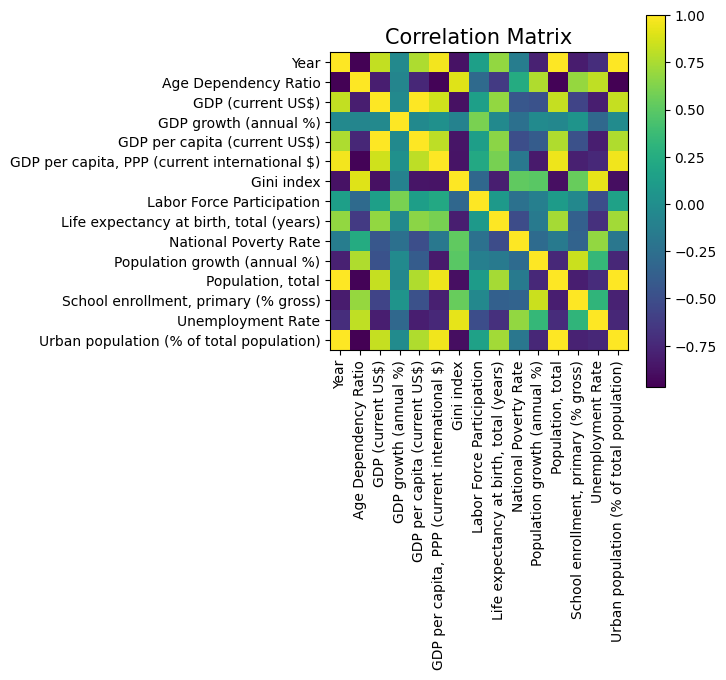

In [101]:
plotCorrelationMatrix(df_pivot, graphWidth=10)


**Año (Year)** -> **GDP, GDP per capita, Population y Urban population**: Positiva. Esto indica que, con el tiempo, estos indicadores tienden a aumentar.

**National Poverty Rate**: Negativa, sugiriendo que, a lo largo de los años, la pobreza nacional ha disminuido.

En otros indicadores la relación varía, pero en general, el tiempo suele influir en la mayoría de las métricas económicas y sociales.

**Relación de Dependencia (Age Dependency Ratio)** -> **GDP per capita**: Negativa. Una mayor proporción de población dependiente suele estar asociada con un menor PIB per cápita.

**Población total**: Positiva. Un aumento en la población total podría incrementar la razón de dependencia.

**PIB (GDP)** -> **GDP per capita**: Alta y positiva, normal, ya que el PIB total y per cápita están estrechamente relacionados.

**Población total y Urbanización**: Positiva, reflejando cómo el crecimiento económico suele ir de la mano con el aumento poblacional y la urbanización.

**Tasa de pobreza**: Negativa, indicando que un mayor PIB suele coincidir con una reducción de la pobreza.

**Crecimiento del PIB (GDP growth)** -> Con otros indicadores donde la relación generalmente es baja o variable, ya que el crecimiento anual puede estar condicionado por múltiples factores.

**PIB per cápita (GDP per capita)** -> Correlación con **Pobreza** negativa; a mayor PIB per cápita, menor tasa de pobreza. Correlación con la **esperanza de vida** positiva; mayores ingresos suelen asociarse con una vida más larga.

**Participación laboral (Labor Force Participation)** -> Correlación con el **Desempleo** negativa, de esperarse ya que mayor participación suele coincidir con menor desempleo.

In [102]:
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # Filtra las columnas para que tengan entre 2 y 49 valores únicos
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    # Calcula el número de filas redondeando hacia arriba
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

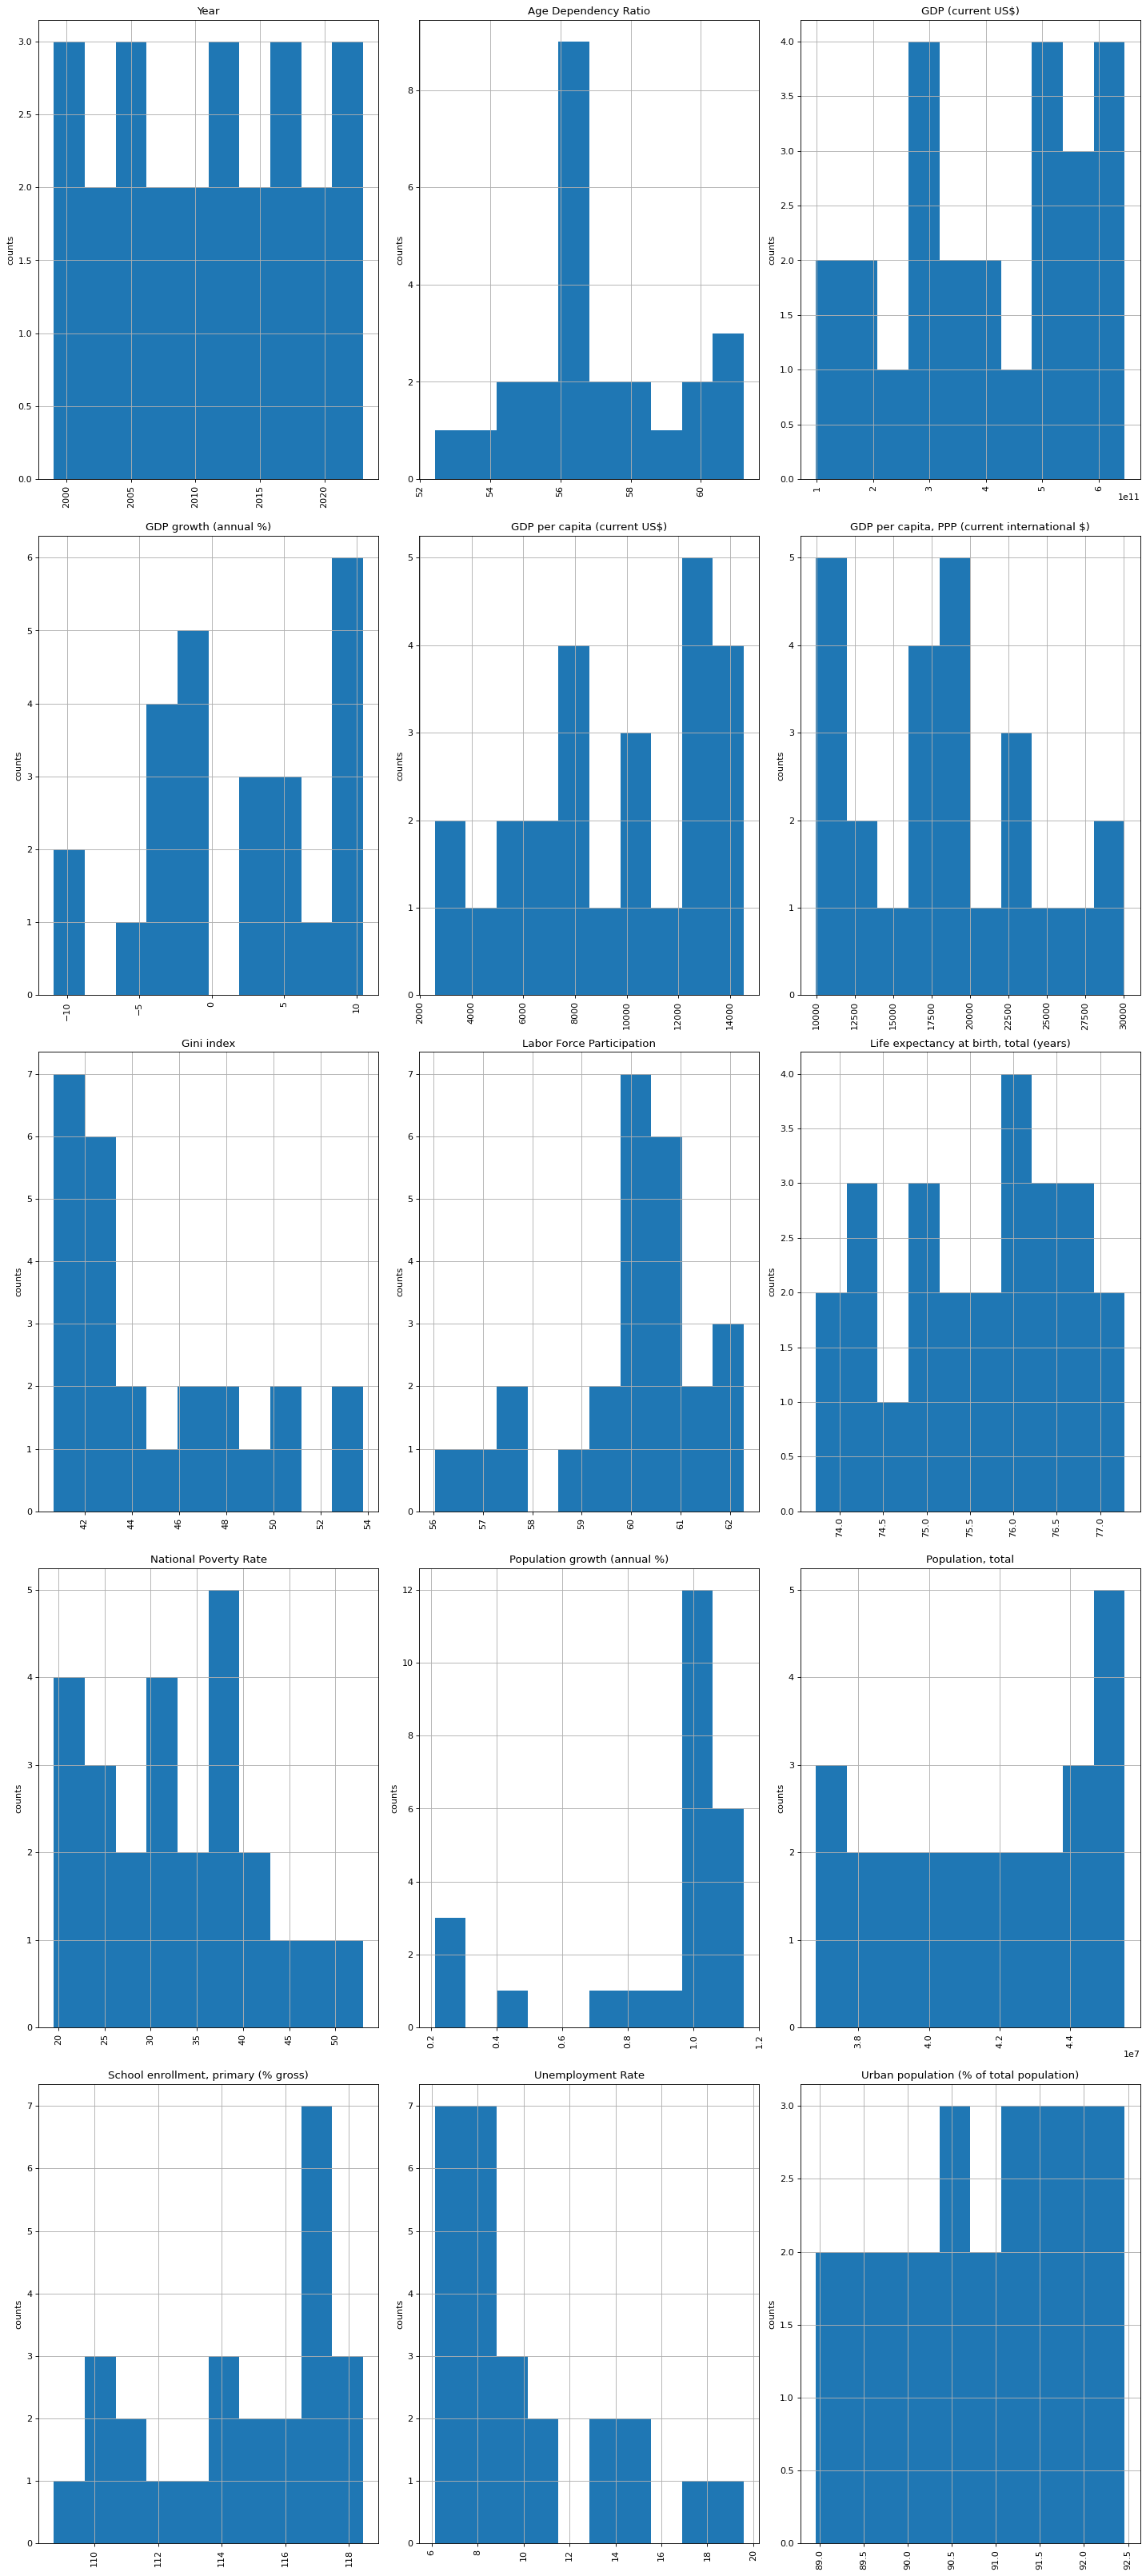

In [103]:
plotPerColumnDistribution(df_pivot, 15, 3)

# Evolución de los indicadores a lo largo del tiempo

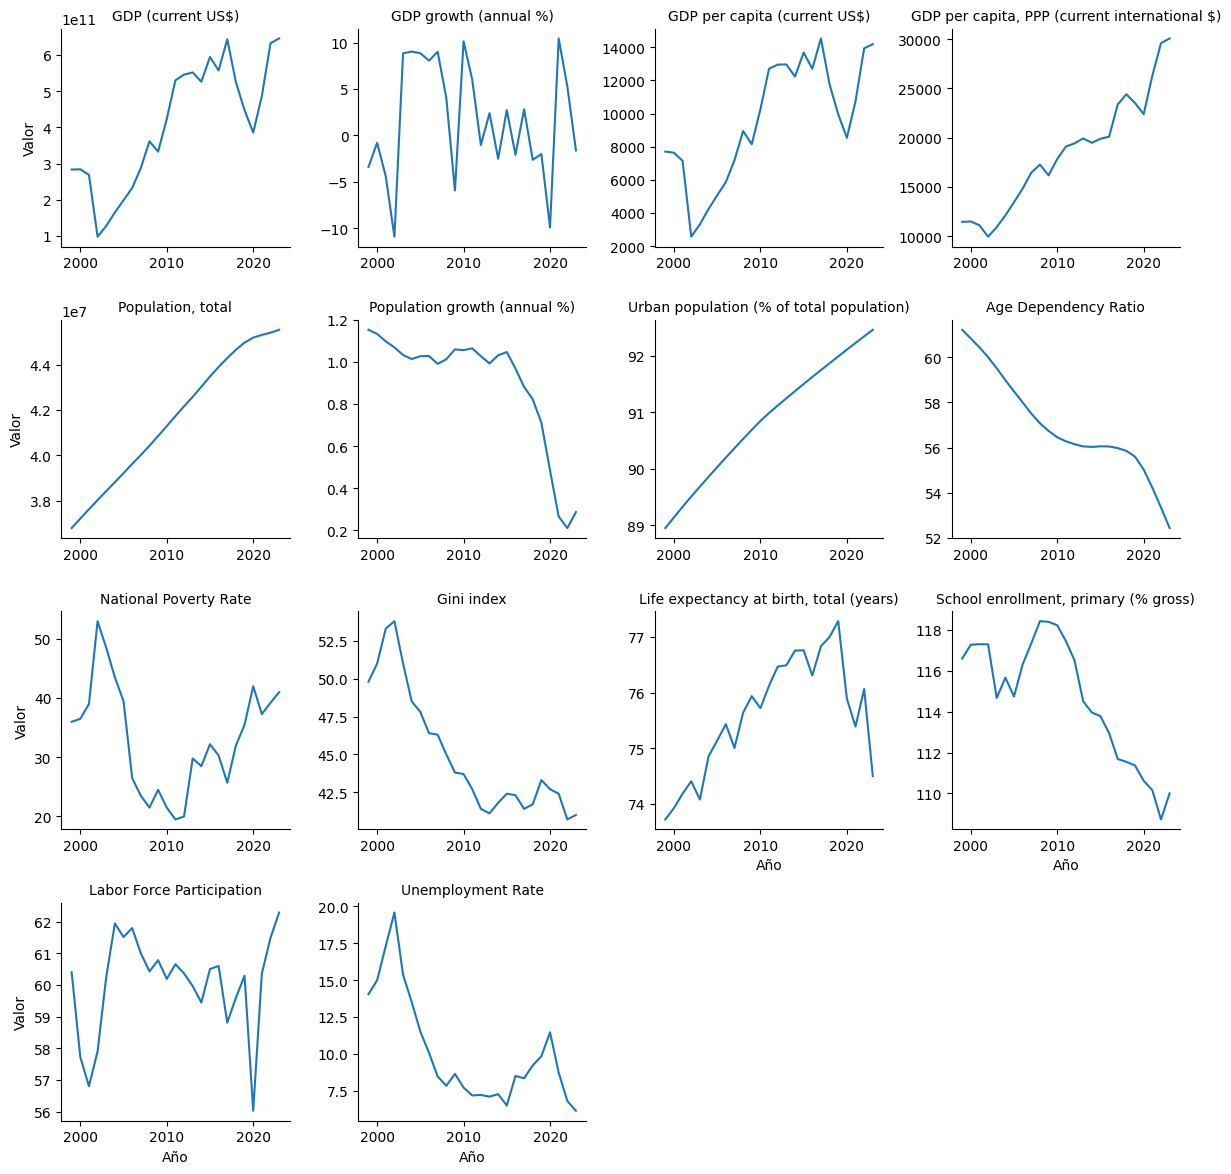

In [104]:
g = sns.FacetGrid(df_data, col="Indicator", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Value")
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Valor")
plt.show()

Podemos notar que en el **Producto Interno Bruto, PIB - Current US$** hay un crecimiento géneral con algunas caídas. La economía ha crecido en terminos absolutos, aunque con momentos de crisis que causaron caidas temporales. El **Crecimiento del PIB, % anual** tiene altas fluctuaciones con caídas pronunciadas en ciertos años. Con crisis economicas y recesiones fuertes como el **estallido del 2001** o la **pandemia en el año 2020**. Conviene compararlo con eventos historicos o politicas economicas. El **PBI Per Capita** muestra un crecimiento estable, con algunas caídas. Aunque el PIB total ha crecido, el PIB per cápita indica si el crecimiento beneficia a la población en promedio.

El **GDP per capita, PPP (US$ internacionales)** muestra una tendencia similar al PIB per cápita, pero ajustado por poder adquisitivo. Muestra si la gente realmente ha mejorado su nivel de vida considerando el costo de vida. La **población total** muestra un crecimiento constante, lo cual quiere decir que la población ha ido aumentando cada año sin interrupciones. El **crecimiento de la población** muestra una tendencia descendente. Aunque la **población total** crece, la tasa de crecimiento desminuye. Esto podría deberse a menor natalidad, emigración o envejecimiento personal. El **% de población total en zonas urbanas** muestra un crecimiento constante, dando a entender que más personas se han mudado a zonas urbanas, lo que puede afectar vivienda, empleo y transporte en ciudades.

La **Relación de dependencia por edad** muestra una tendencia descendente lo cuál indica que hay menos personas dependientes (niños y ancianos) por cada persona en edad productiva, lo cual puede ser positivo para la economía en el corto plazo.

La **Tasa de pobreza nacional** muestra fluctuaciones, con picos de aumentos en algunos años. La pobreza ha disminuido en algunos períodos, pero ha tenido momentos de aumento, lo que podría estar relacionado con crisis económicas.

El **Índice de Gini/Desigualdad económica** muestra una tendencia descendente, la desigualdad ha disminuido con el tiempo, aunque puede haber variaciones locales.

La **Esperanza de vida al nacer** muestra un crecimiento estable hasta una leve caída reciente. La salud y calidad de vida han mejorado, aunque la reciente caída puede estar relacionada con eventos sanitarios como la **pandemia (2020)**.

El **School Enrollment, Primary (% Bruto de matrícula escolar primaria)** muestra crecimiento hasta un pico, luego descenso. Esto puede indicar mejoras en acceso a la educación en un período, pero luego caída en la matrícula por cambios demograficos o educativos.

La **Participación en la fuerza laboral** muestra una tendencia fluctuante, pero con una reciente caída. Esto podría deberse a **crisis económicas, cambios en la población activa o efectos de la pandemia**.

La **Tasa de desempleo** muestra un descenso con picos de aumento en ciertos períodos. El desempleo ha disminuido en general, pero con momentos de crisis en los que aumentó.


In [105]:
fig = px.scatter(df_pivot, 
                 x='Age Dependency Ratio', 
                 y='GDP per capita (current US$)', 
                 color='Year',
                 size='GDP per capita (current US$)', 
                 hover_data=['Year'], 
                 trendline="ols", # Regresión lineal!!!
                 title='Relación entre Radio de Dependencia por Edad y PIB per cápita',
                 labels={'Age Dependency Ratio': 'Radio de Dependencia por Edad (% de población en edad de trabajar)',
                         'GDP per capita (current US$)': 'PIB per cápita (USD actuales)'},
                 template='plotly_white') 

fig.update_layout(
    xaxis_title="Radio de Dependencia por Edad (% de población en edad de trabajar)",
    yaxis_title="PIB per cápita (USD actuales)",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",
    font=dict(size=12, family="Arial"),
    title_font_size=20
)

fig.show()

Si hay más personas dependientes en relación con la población trabajadora, la productividad económica por habitante tiende a verse afectada. Pero también otros factores económicos afectan esto. Si la tendencia negativa se mantiene, el país necesitará políticas que aumenten la productividad laboral o incentiven el crecimiento de la población económicamente activa.

In [106]:
fig = px.scatter(df_pivot, 
                 x='Age Dependency Ratio', 
                 y='Population, total', 
                 color='Year',  
                 size='Population, total',
                 hover_data=['Year'], 
                 trendline="ols", 
                 title='Radio de Dependencia por Edad vs. Población Total',
                 labels={'Age Dependency Ratio': 'Radio de Dependencia por Edad (% de población en edad de trabajar)',
                         'Population, total': 'Población Total'},
                 template='plotly_white')  


fig.update_layout(
    xaxis_title="Radio de Dependencia por Edad (% de población en edad de trabajar)",
    yaxis_title="Población Total",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",
    font=dict(size=12, family="Arial"),
    title_font_size=20
)


fig.add_annotation(
    x=55,
    y=46000000,  
    xref="x",
    yref="y",
    text="Tendencia positiva",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

fig.show()

Argentina ha experimentado un crecimiento constante en su población total, el cual viene acompañado de un aumento en la proporción de personas dependientes. Este aumento en la dependencia sugiere que la proporción de personas en edad de trabajar está disminuyendo... y a futuro, el país podría enfrentar desafíos en términos de sostenibilidad económica y social.

In [107]:

fig = px.scatter(df_pivot, 
                 x='Labor Force Participation', 
                 y='Unemployment Rate', 
                 color='Year', 
                 size='Labor Force Participation',  
                 hover_data=['Year'],
                 trendline="ols",  
                 title='Relación entre Participación laboral y Tasa de Desempleo',
                 labels={'Labor Force Participation': 'Participación laboral',
                         'Unemployment Rate': 'Tasa de Desempleo'},
                 template='plotly_white')


fig.update_layout(
    xaxis_title="Participación Laboral",
    yaxis_title="Tasa de Desempleo",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",
    font=dict(size=12, family="Arial"),
    title_font_size=20
)


fig.add_annotation(
    x=58,
    y=20.2,
    xref="x",
    yref="y",
    text="Mayor participación con desempleo",
    showarrow=True,
    arrowhead=2,
    ax=25,
    ay=-30
)

# Mostrar el gráfico
fig.show()

Aunque intuitivamente uno esperaría una relación inversa (menor desempleo con mayor participación), el gráfico muestra que en este caso la dinámica es más compleja. La tendencia positiva podría reflejar períodos donde la entrada masiva a la fuerza laboral supera la capacidad de absorción del mercado, un fenómeno típico en economías bajo presión.

In [108]:
import plotly.express as px

fig = px.line(
    df_pivot,
    x='Year',
    y='Labor Force Participation',
    color='Age Dependency Ratio',
    title='Evolución de la Participación Laboral por Radio de Dependencia por Edad',
    labels={
        'Labor Force Participation': 'Participación Laboral (% de población en edad de trabajar)',
        'Year': 'Año',
        'Age Dependency Ratio': 'Radio de Dependencia por Edad (% de población dependiente)'
    },
    template='plotly_white',
    markers=True, 
    line_shape='linear'
)

fig.update_layout(
    hovermode="x unified",
    xaxis_title="Año",
    yaxis_title="Participación Laboral (% de población en edad de trabajar)",
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        tickformat='%Y'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        range=[50, 65]
    ),
    showlegend=True,
    legend_title_text='Radio de Dependencia por Edad', 
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.update_traces(
    line=dict(width=2), 
    hovertemplate='<b>Año: %{x}</b><br>Participación: %{y:.1f}%<br>Ratio Dep.: %{customdata:.1f}%<extra></extra>',
    customdata=df_pivot['Age Dependency Ratio']  
)


fig.add_annotation(
    x=2020,
    y=56.5,  
    xref="x",
    yref="y",
    text="Pandemia",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="darkblue")
)


fig.add_annotation(
    x=2001,
    y=56.5,  
    xref="x",
    yref="y",
    text="Crisis del 2001",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=30,  
    font=dict(size=12, color="red")
)

# Mostrar gráfico
fig.show()

Podemos notar tendencias negativas en años clave donde hubo crisis económicas o la pandemia de 2020 (un mayor radio de dependencia podría implicar menor participación laboral, ya que más población dependiente reduce la proporción de personas en edad de trabajar).

In [109]:
fig = px.line(
    df_pivot,
    x='Year',
    y=['Gini index', 'GDP per capita (current US$)'],
    title='Evolución del Índice de Gini y PIB per cápita',
    labels={
        'value': 'Valor',
        'Year': 'Año',
        'variable': 'Indicador'
    },
    template='plotly_white',
    line_shape='spline',
    markers=True 
)

fig.update_layout(
    hovermode="x unified",
    xaxis_title="Año",
    yaxis_title="Valor (Índice de Gini % / PIB per cápita USD)",
    showlegend=True,
    legend_title_text='Indicador',
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    xaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.update_traces(
    line=dict(width=3, dash='solid'),

    hovertemplate='<b>Año: %{x}</b><br><b>%{data.name}</b>: %{y:.2f}<extra></extra>',
    customdata=df_pivot[['Year']] 
)

fig.add_annotation(
    x=2002,
    y=45,
    xref="x",
    yref="y",
    text="Crisis 2001-2002 (Gini)",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="darkred")
)

fig.add_annotation(
    x=2020,
    y=8500, 
    xref="x",
    yref="y",
    text="Pandemia (PIB per cápita)",
    showarrow=True,
    arrowhead=2,
    ax=-20,
    ay=30,
    font=dict(size=12, color="darkblue")
)


fig.show()

Podemos notar que las crisis (2001-2002, 2020) afectan negativamente el PIB per cápita y aumentan la desigualdad (Gini). Si el PIB per cápita crece entre 2002 y 2019, refleja recuperación económica. Si el Gini disminuye en ese período, indica mejora en la distribución; si aumenta, sugiere crecimiento desigual.

In [110]:
fig = px.line(df_pivot, 
              x='Year', 
              y='Gini index', 
              title='Evolución de la Desigualdad (Índice de Gini) a lo largo del tiempo',
              labels={'Gini index': 'Índice de Gini',
                      'Year': 'Año'},
              template='plotly_white',  
              line_shape='spline',
              markers=False)  


fig.update_layout(
    hovermode="x unified",  
    xaxis_title="Año",
    yaxis_title="Índice de Gini",
    xaxis=dict(showgrid=True, gridcolor='lightgray', tickformat='%Y'),
    yaxis=dict(showgrid=True, gridcolor='lightgray', range=[35, 55]),
    font=dict(size=12, family="Arial"),
    title_font_size=20,
)



fig.add_trace(go.Scatter(
    x=df_pivot['Year'],
    y=df_pivot['Gini index'],
    fill='tozeroy',
    fillcolor='rgba(0, 0, 255, 0.3)',  
    line=dict(width=0),  
    showlegend=False,
    hoverinfo="skip" 
))

fig.add_annotation(
    x=2002, 
    y=54,   
    xref="x",
    yref="y",
    text="Crisis 2001-2002",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    font=dict(size=12, color="darkred")
)

fig.add_annotation(
    x=2020, 
    y=42,  
    xref="x",
    yref="y",
    text="Pandemia",
    showarrow=True,
    arrowhead=2,
    ax=-20,
    ay=30,
    font=dict(size=12, color="darkgreen")
)

fig.show()

In [111]:
fig = px.scatter(df_pivot, 
                 x='Life expectancy at birth, total (years)', 
                 y='GDP per capita (current US$)', 
                 color='Year',
                 size='GDP per capita (current US$)', 
                 hover_data=['Year'],  
                 trendline="ols", 
                 title='Relación entre Esperanza de Vida y PIB per cápita',
                 labels={'Life expectancy at birth, total (years)': 'Esperanza de Vida al Nacimiento (años)',
                         'GDP per capita (current US$)': 'PIB per cápita (USD actuales)'},
                 template='plotly_white') 


fig.update_layout(
    xaxis_title="Esperanza de Vida al Nacimiento (años)",
    yaxis_title="PIB per cápita (USD actuales)",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",  
    font=dict(size=12, family="Arial"),
    title_font_size=20
)


fig.add_annotation(
    x=77.07,
    y=12500,
    xref="x",
    yref="y",
    text="Tendencia positiva",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

# Mostrar el gráfico
fig.show()

Un mayor PIB per cápita tiende a correlacionarse con una mayor esperanza de vida. Un PIB per cápita más alto suele reflejar mejores condiciones económicas, lo que a menudo se traduce en mejor acceso a servicios de salud, educación, nutrición y saneamiento, todos factores que influyen en la esperanza de vida. Sin embargo, también notamos que hay períodos en los que el PIB per cápita es menor y la esperanza de vida aumenta con respecto al período anterior. Esto se debe a que el PIB per cápita es una variable general que no toma en cuenta otros factores socioeconómicos.

In [112]:
fig = px.scatter(df_pivot, 
                 x='National Poverty Rate', 
                 y='Life expectancy at birth, total (years)', 
                 color='Year',  
                 size='National Poverty Rate',  
                 hover_data=['Year'], 
                 trendline="ols",  
                 title='Distribución de la Esperanza de Vida por Nivel de Pobreza',
                 labels={'National Poverty Rate': 'Tasa de Pobreza Nacional (%)',
                         'Life expectancy at birth, total (years)': 'Esperanza de Vida al Nacimiento (años)'},
                 template='plotly_white')  

fig.update_layout(
    xaxis_title="Tasa de Pobreza Nacional (%)",
    yaxis_title="Esperanza de Vida al Nacimiento (años)",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified", 
    font=dict(size=12, family="Arial"),
    title_font_size=20
)


fig.add_annotation(
    x=53,
    y=74.7,
    xref="x",
    yref="y",
    text="Tendencia negativa clara",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

fig.show()

El pico más alto de pobreza fue en periodo 2001-2002 donde podemos entender que, mientras mayor sea la pobreza, menor tiende a ser la esperanza de vida de la población. Debido a factores como menor acceso a atención médica, nutrición inadecuada y condiciones de vida más precarias. 

In [113]:
fig1 = px.scatter(
    df_pivot,
    x='GDP (current US$)',
    y='National Poverty Rate',
    color='Year', 
    size='National Poverty Rate',
    hover_data=['Year'],
    trendline="ols",  
    title='Relación entre PIB Total y Tasa de Pobreza',
    labels={
        'GDP (current US$)': 'PIB Total (US$ corriente)',
        'National Poverty Rate': 'Tasa de Pobreza Nacional (%)'
    },
    template='plotly_white'
)

fig1.update_layout(
    xaxis_title="PIB Total (US$ corriente)",
    yaxis_title="Tasa de Pobreza Nacional (%)",
    xaxis=dict(showgrid=True, gridcolor='lightgray', tickformat='$,.0f'), 
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    margin=dict(l=50, r=50, t=80, b=50)
)


fig2 = px.scatter(
    df_pivot,
    x='GDP per capita (current US$)',
    y='National Poverty Rate',
    color='Year',
    size='National Poverty Rate',
    hover_data=['Year'],
    trendline="ols",
    title='Relación entre PIB per cápita y Tasa de Pobreza',
    labels={
        'GDP per capita (current US$)': 'PIB per cápita (US$ corriente)',
        'National Poverty Rate': 'Tasa de Pobreza Nacional (%)'
    },
    template='plotly_white'
)

fig2.update_layout(
    xaxis_title="PIB per cápita (US$ corriente)",
    yaxis_title="Tasa de Pobreza Nacional (%)",
    xaxis=dict(showgrid=True, gridcolor='lightgray', tickformat='$,.0f'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=True,
    legend_title_text='Año',
    hovermode="x unified",
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    margin=dict(l=50, r=50, t=80, b=50)
)


fig1.add_annotation(
    x=390000000000,
    y=44,
    xref="x",
    yref="y",
    text="Pandemia",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

fig1.add_annotation(
    x=100000000000,
    y=55,
    xref="x",
    yref="y",
    text="Crisis del 2001",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

fig2.add_annotation(
    x=2600,
    y=55,
    xref="x",
    yref="y",
    text="Crisis del 2001",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

fig2.add_annotation(
    x=8600,
    y=45,
    xref="x",
    yref="y",
    text="Pandemia",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30
)

# Mostrar gráficos
fig1.show()
fig2.show()

Eventos de crisis tienen un impacto fuerte y duradero en la pobreza. Tanto la crisis del 2001 como la pandemia muestran un fuerte aumento de la pobreza con caídas del PIB. Aunque un PIB más alto generalmente se asocia con menos pobreza, hay crisis donde la pobresa sube incluso con un PIB elevado. (la relació no es completamente lineal)

# Conclusiones

El análisis muestra que Argentina viene aumentando su población total, pero con una mayor proporción de personas dependientes. Si esta tendencia sigue, habrá menos personas en edad de trabajar, lo que podría afectar la productividad y la sostenibilidad económica.

El mercado laboral no siempre responde de forma predecible. Aunque se esperaría que mayor participación signifique menor desempleo, el gráfico muestra que no siempre es así. En algunos períodos, la oferta laboral creció más rápido de lo que la economía pudo absorber.

Las crisis (2001-2002, 2020) generaron picos de pobreza y caída del PIB. La relación entre PIB y pobreza no es completamente lineal, pero en general, cuando el PIB baja, la pobreza sube. También se nota que un PIB per cápita más alto tiende a estar asociado con mayor esperanza de vida, aunque hay excepciones donde esta última crece incluso con un PIB menor.

Los datos no solo muestran números, sino historias de crisis, recuperación y cambio. Argentina ha pasado por momentos duros, donde la economía golpeó fuerte a la población, no obstante también ha mostrado capacidad de recuperación. Sin embargo, el crecimiento no siempre ha sido equitativo y la desigualdad sigue siendo un desafío. :)